# clustering 

### Indexing:
- [Simple example](#Simple-example)
- [Elbow method](#Elbow-method)
- [Silhouette method](#Silhouette-method)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import multiprocessing

### Simple example

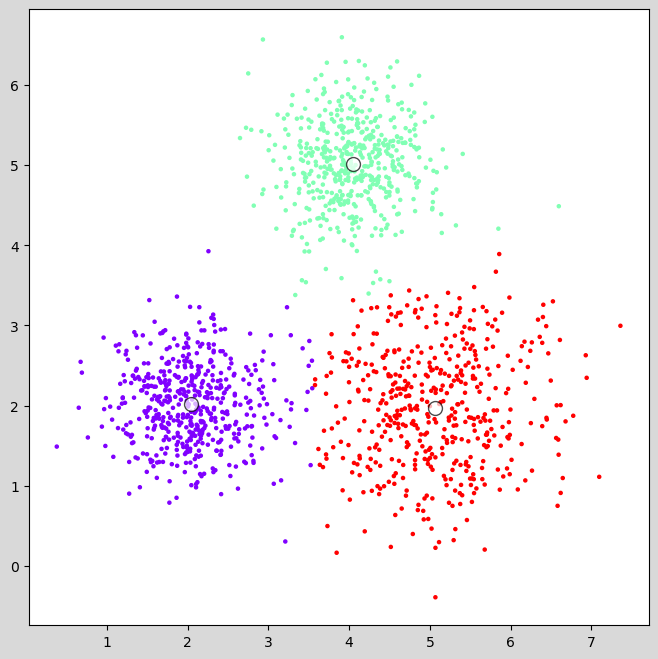

In [2]:
np.random.seed(42)
num_points = 500
C1 = np.random.normal(loc=[2, 2], scale=.5, size=(num_points, 2))
C2 = np.random.normal(loc=[4, 5], scale=0.5, size=(num_points, 2))
C3 = np.random.normal(loc=[5, 2], scale=0.8, size=(num_points, 2))
X = np.vstack((C1, C2, C3))
np.random.shuffle(X) #desordenar el array

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

f, ax = plt.subplots(figsize = (8,8),facecolor='.85')
ax.scatter(X[:,0], X[:,1], s =5, c=y_kmeans, cmap='rainbow')
ax.scatter(centers[:, 0], centers[:, 1], c='white', edgecolor='black', s=100, alpha=0.7, marker='o')
plt.show()

[Back to top](#Indexing)


### Elbow method

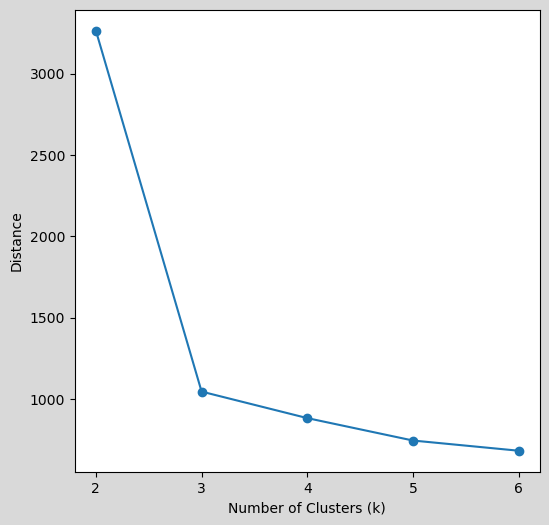

In [4]:
max_n_of_C = 6
range_n_clusters = np.arange(2,max_n_of_C+1,1)

avg_distance=[]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(X)
  avg_distance.append(clusterer.inertia_)

f, ax = plt.subplots(figsize = (6,6),facecolor='.85')
ax.plot(range_n_clusters, avg_distance, '-o')
ax.set_xticks(range_n_clusters)
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Distance")
plt.show()

[Back to top](#Indexing)


### Silhouette method

n_clusters: 2 | Average silhouette_score: 0.49
n_clusters: 3 | Average silhouette_score: 0.65
n_clusters: 4 | Average silhouette_score: 0.54
n_clusters: 5 | Average silhouette_score: 0.54
n_clusters: 6 | Average silhouette_score: 0.53


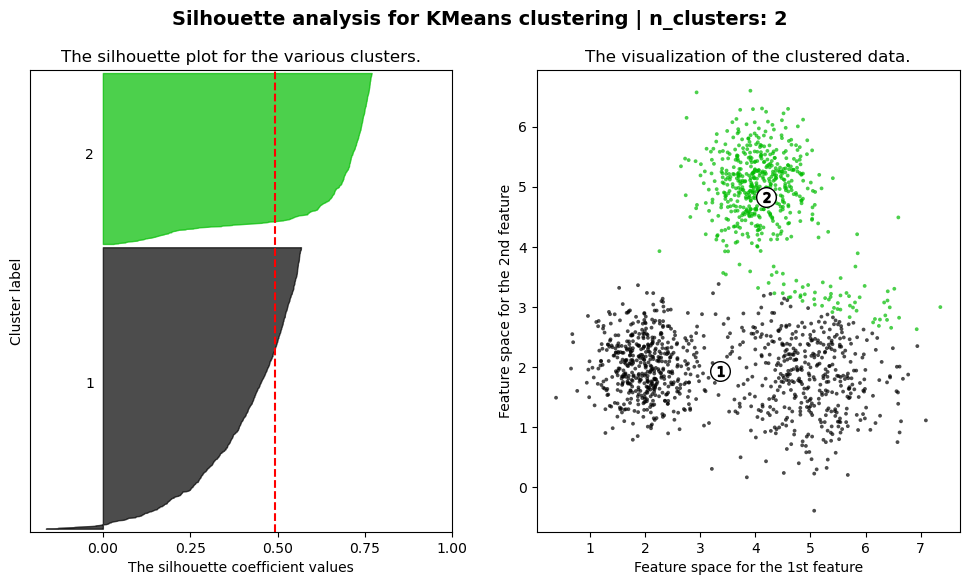

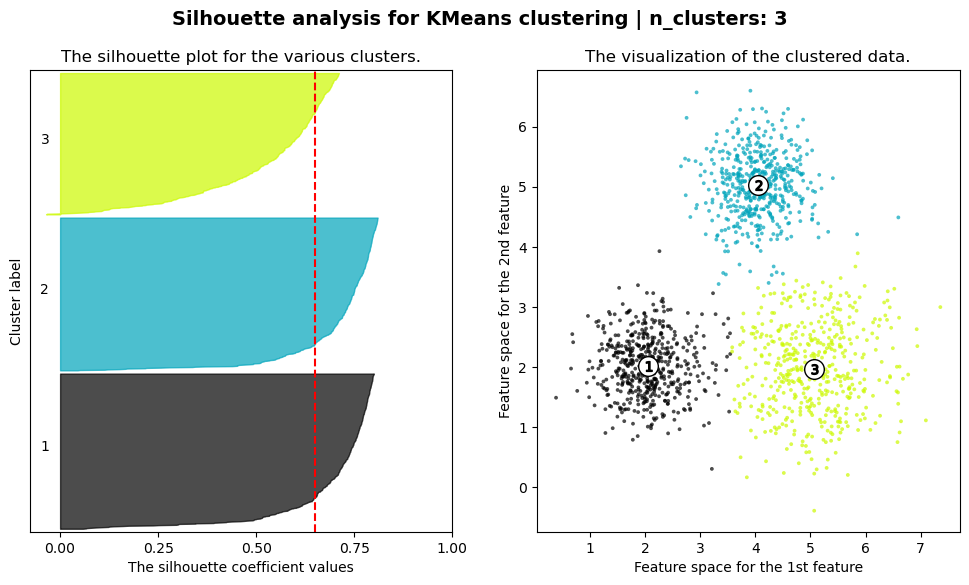

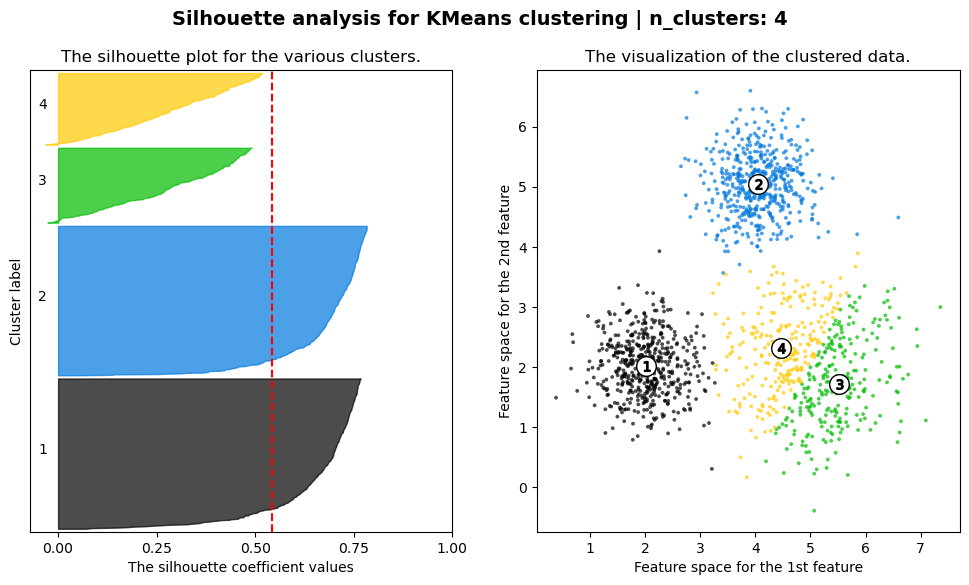

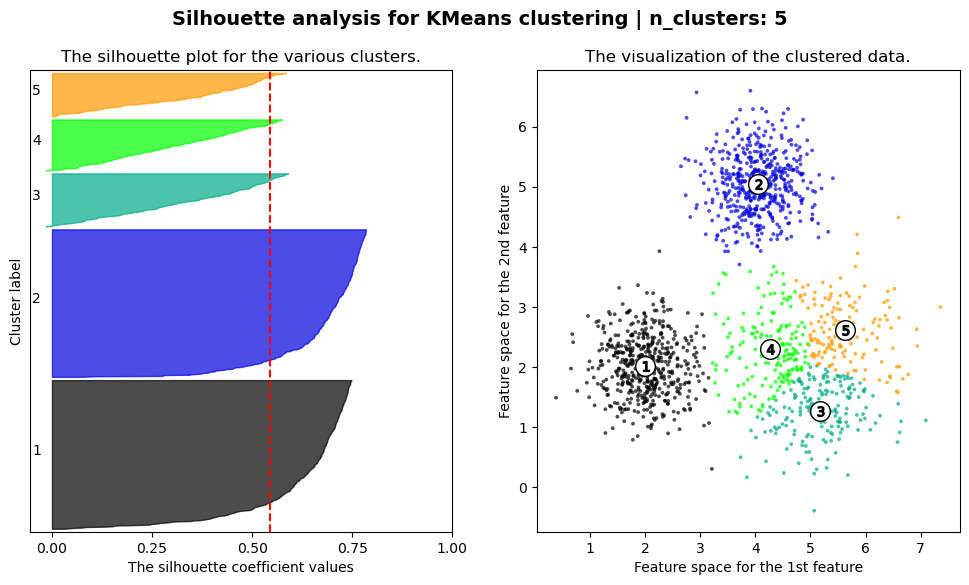

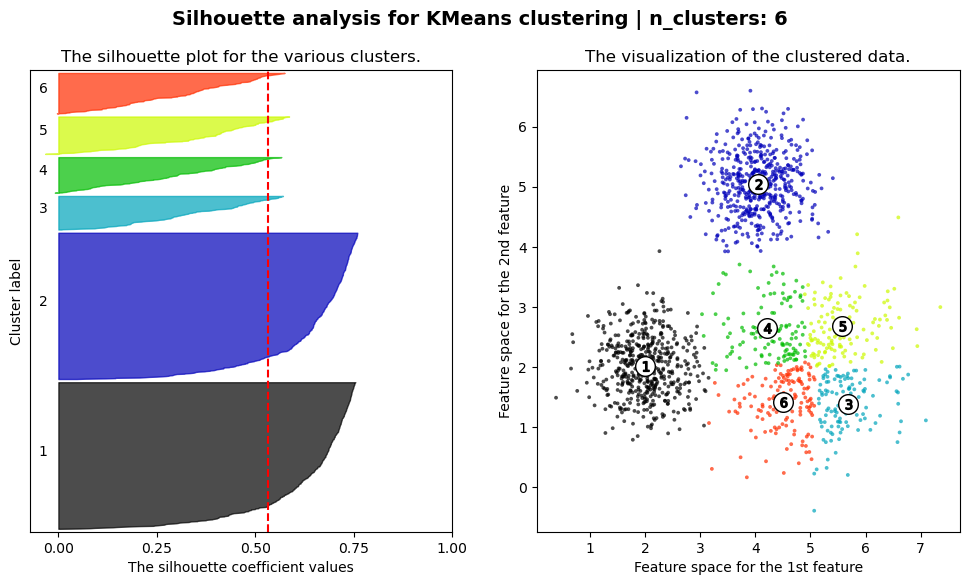

In [9]:
max_n_of_C = 6
range_n_clusters = np.arange(2,max_n_of_C+1,1)
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    # fig.set_size_inches(18, 7)

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10]) # (n_clusters+1)*10 is for inserting blank space between silhouette

    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"n_clusters: {n_clusters} | Average silhouette_score: {silhouette_avg:.2f}")

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # silhouette scores for each i’th point
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = len(ith_cluster_silhouette_values)
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1)) # set ax1 ylabels [2,3,4, ...]
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") 
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([0, 0.25, .5, 0.75, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f'${i+1}$', alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f"Silhouette analysis for KMeans clustering | n_clusters: {n_clusters}",
                 fontsize=14, fontweight='bold')

plt.show()

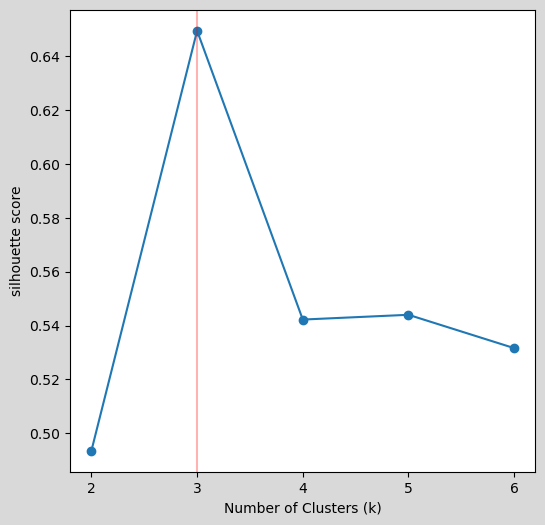

In [10]:
indx_max_silhouette_avg = silhouette_avg_n_clusters.index(max(silhouette_avg_n_clusters))
f, ax = plt.subplots(figsize = (6,6),facecolor='.85')
ax.plot(range_n_clusters, silhouette_avg_n_clusters, '-o')
ax.axvline(range_n_clusters[indx_max_silhouette_avg], color="red", alpha=.3)
ax.set_xticks(range_n_clusters)
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("silhouette score")
plt.show()

[Back to top](#Indexing)
